## XAMS SiPM simulation## 

In [1]:
#
# import the SiPM classes
#
from SiPM import *
# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define general geometry parameters ###

In [2]:
# z position of the in-plane SiPMs
z_plane = 10
# radius of the cyinder for SiPMs at the side
r_cylinder = 22
# radius of a SiPM - I assume circular SiPMs with a radius to make the area correspond to a 3x3mm2 square.
r_sipm = 1.6925
#wire thickness of anode wire
wire_thickness = 4 *10**-3
#wire spacing of anode wires
wire_spacing = 2.6-wire_thickness
# build geometry
geo = GeoParameters(z_plane=z_plane, r_cylinder=r_cylinder, r_sipm=r_sipm, wire_thickness=wire_thickness, wire_spacing=wire_spacing)

### Define the geometry of the silicon PMs ###

In [3]:
# generate a XAMS geometry with SiPMs in plane above the LXe

# center SiPMs
sipm = SiPM(type="plane",position=[0,4,z_plane],qeff=0.25)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[0,-4,z_plane],qeff=0.25)
geo.add_sipm(sipm)

# ring SiPMs
n_circ = 6
r = 17.5
for phi in np.linspace(0,2*np.pi,n_circ,endpoint=False):
    sipm = SiPM(type="plane",position=[r*np.cos(phi),r*np.sin(phi),z_plane],qeff=0.25)
    geo.add_sipm(sipm)

### Simulate the SiPM acceptance ###

* uv_position is the position where the UV photons are generated
* n_mc is the number of MC photons

In [4]:
n_mc = 100000
sims = []
xbins = 8
ybins = 8
xmax = 20
ymax = 20

for x in np.linspace(0,xmax,xbins,endpoint=True):
    for y in np.linspace(0,ymax,ybins,endpoint=True):
        print("simulate @ x= ",x," mm", "simulate @ y= ",y, "mm")
        sim = Simulator(geo=geo,uv_position=[x,y,0],n_mc=n_mc)
        sim.generate_events()
        sims.append(sim)

simulate @ x=  0.0  mm simulate @ y=  0.0 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [0. 0. 0.]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00143  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00140  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00021  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00020  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.00024  qe = 0.250
 5  (x,y,z) = (-17.5,  0.0, 10.0) p(hit) = 0.00020  qe = 0.250
 6  (x,y,z) = (-8.8, -15.2, 10.0) p(hit) = 0.00020  qe = 0.250
 7  (x,y,z) = ( 8.7, -15.2, 10.0) p(hit) = 0.00018  qe = 0.250
event generation done
simulate @ x=  0.0  mm simulate @ y=  2.857142857142857 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [0.         2.85714286 0.        ]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00183  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00106  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00021  qe = 0.250
 3  (x,y,z)

Number of SiPMs =  8  Generated hits from x= [ 2.85714286 11.42857143  0.        ]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00088  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00028  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00020  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00098  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.00051  qe = 0.250
 5  (x,y,z) = (-17.5,  0.0, 10.0) p(hit) = 0.00010  qe = 0.250
 6  (x,y,z) = (-8.8, -15.2, 10.0) p(hit) = 0.00007  qe = 0.250
 7  (x,y,z) = ( 8.7, -15.2, 10.0) p(hit) = 0.00006  qe = 0.250
event generation done
simulate @ x=  2.857142857142857  mm simulate @ y=  14.285714285714286 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [ 2.85714286 14.28571429  0.        ]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00063  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00020  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00015  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0)

Number of SiPMs =  8  Generated hits from x= [8.57142857 0.         0.        ]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00067  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00074  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00070  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00028  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.00013  qe = 0.250
 5  (x,y,z) = (-17.5,  0.0, 10.0) p(hit) = 0.00009  qe = 0.250
 6  (x,y,z) = (-8.8, -15.2, 10.0) p(hit) = 0.00010  qe = 0.250
 7  (x,y,z) = ( 8.7, -15.2, 10.0) p(hit) = 0.00027  qe = 0.250
event generation done
simulate @ x=  8.571428571428571  mm simulate @ y=  2.857142857142857 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [8.57142857 2.85714286 0.        ]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00081  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00052  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00068  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit)

Number of SiPMs =  8  Generated hits from x= [11.42857143 11.42857143  0.        ]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00042  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00017  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00045  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00137  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.00012  qe = 0.250
 5  (x,y,z) = (-17.5,  0.0, 10.0) p(hit) = 0.00003  qe = 0.250
 6  (x,y,z) = (-8.8, -15.2, 10.0) p(hit) = 0.00003  qe = 0.250
 7  (x,y,z) = ( 8.7, -15.2, 10.0) p(hit) = 0.00011  qe = 0.250
event generation done
simulate @ x=  11.428571428571429  mm simulate @ y=  14.285714285714286 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [11.42857143 14.28571429  0.        ]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00028  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00013  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00027  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0

Number of SiPMs =  8  Generated hits from x= [17.14285714  0.          0.        ]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00021  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00018  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00172  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00024  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.00008  qe = 0.250
 5  (x,y,z) = (-17.5,  0.0, 10.0) p(hit) = 0.00003  qe = 0.250
 6  (x,y,z) = (-8.8, -15.2, 10.0) p(hit) = 0.00007  qe = 0.250
 7  (x,y,z) = ( 8.7, -15.2, 10.0) p(hit) = 0.00024  qe = 0.250
event generation done
simulate @ x=  17.142857142857142  mm simulate @ y=  2.857142857142857 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [17.14285714  2.85714286  0.        ]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00026  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00022  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00165  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0)

Number of SiPMs =  8  Generated hits from x= [20.         11.42857143  0.        ]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00013  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00012  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00050  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00049  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.00005  qe = 0.250
 5  (x,y,z) = (-17.5,  0.0, 10.0) p(hit) = 0.00002  qe = 0.250
 6  (x,y,z) = (-8.8, -15.2, 10.0) p(hit) = 0.00003  qe = 0.250
 7  (x,y,z) = ( 8.7, -15.2, 10.0) p(hit) = 0.00006  qe = 0.250
event generation done
simulate @ x=  20.0  mm simulate @ y=  14.285714285714286 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [20.         14.28571429  0.        ]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00013  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00008  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00030  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.0

### Emulate events and reconstruct the position ###

* n_event = number of events to emulate
* n_uv = number of UV photons assumed for the S2 signal

In [5]:
recs = []
n_uv = 50000
for sim in sims:
    rec = Reconstruction(sim=sim)
    rec.emulate_events(n_uv=n_uv,n_event=10000,method="CHI2",plot=False,nbins=1000,range=((-30,30),(-30,30)))
    recs.append(rec)

generated  0  events
generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
generated  1000  events
generated  1100  events
generated  1200  events
generated  1300  events
generated  1400  events
generated  1500  events
generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
gene

generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800 

generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500  events
generated  9600  events
generated  9700  events
generated  9800  events
generated  9900  events
reconstruction done
                 I       chi2      fval  status  xgen        xr       ygen  \
0     51801.224898  22.932680  6.798036     1.0   0.0 -1.217332  11.428571   
1     52006.982295  21.178424  3.645866     1.0   0.0 -1.917102  11.428571   
2     46384.781157  22.846991  7.142980     1.0   0.0 -0.353825  11.428571   
3     45664.263481  22.298531  6.410756     1.0   0.0 -0.903459  11.428571   
4     43043.869928  21.608602  6.290120     1.0   0.0  0.389012  11.428571   
...            ...        ...       ...     ...   ...       ...        ...   
9995  56571.148632  22.389452  4.259785     1.0   0.0  0.294613  11.428571   
9996  50320.981454  25.460709  8.232721     1.0   0.0  1.203268  11.428571   
9997  47943.045434  20.818616  4.69002

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500  events
generated  9600  events
generated  9700 

reconstruction done
                 I       chi2       fval  status      xgen        xr  ygen  \
0     56604.769591  35.132061  11.317108     1.0  2.857143  4.011057   0.0   
1     58773.662342  30.902932   4.224188     1.0  2.857143  2.055895   0.0   
2     54801.810912  30.723518   5.758636     1.0  2.857143  2.032303   0.0   
3     54469.344406  29.791068   4.662740     1.0  2.857143  1.557394   0.0   
4     47792.244710  22.276113   0.211120     1.0  2.857143  1.434476   0.0   
...            ...        ...        ...     ...       ...       ...   ...   
9995  53927.642326  28.666959   4.450687     1.0  2.857143  2.473423   0.0   
9996  51210.557605  24.509856   1.367192     1.0  2.857143  2.286738   0.0   
9997  57418.959159  28.279509   2.379508     1.0  2.857143  2.308046   0.0   
9998  51290.297669  24.484867   1.769616     1.0  2.857143  2.836400   0.0   
9999  51850.724161  27.470640   3.105040     1.0  2.857143  0.077919   0.0   

            yr  
0     0.426226  
1    -1.2

generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
generated  1000  events
generated  1100  events
generated  1200  events
generated  1300  events
generated  1400  events
generated  1500  events
generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
g

generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900 

generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500  events
generated  9600  events
generated  9700  events
generated  9800  events
generated  9900  events
reconstruction done
                 I       chi2      fval  status      xgen        xr      ygen  \
0     53232.574299  21.370793  1.271462     1.0  5.714286  5.942481  2.857143   
1     49284.206753  26.656626  8.193194     1.0  5.714286  6.010932  2.857143   
2     51799.833878  28.136445  8.955014     1.0  5.714286  6.306156  2.857143   
3     47184.797488  24.233461  6.538236     1.0  5.714286  6.121512  2.857143   
4     51198.972857  24.090910  2.355384     1.0  5.714286  3.429588  2.857143   
...            ...        ...       ..

generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
generated  1000  events
generated  1100  events
generated  1200  events
generated  1300  events
generated  1400  events
generated  1500  events
generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
g

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  1100  events
generated  1200  events
generated  1300  events
generated  1400  events
generated  1500  events
generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
<SiPM.SiPM object at 0x7fb618f7d490>  n =  22
<SiPM.SiPM object at 0x7fb618f7d520>  n =  7
<SiPM.SiPM object at 0x7fb618f7d550>  n =  10
<SiPM.SiPM object at 0x7fb618f7d5b0>  n =  75
<SiPM.SiPM object at 0x7fb618f7d610>  n =  25
<SiPM.SiPM object at 0x7fb618f7d670>  n =  4
<SiPM.SiPM object at 0x7fb618f7d6d0>  n =  5
<SiPM.SiPM object at 0x7fb618f7d730>  n =  8
m_status = False
generated  8000  events
generated  8100  events
generated  8200  ev

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected
/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
<SiPM.SiPM object at 0x7fb618f7d2b0>  n =  15
<SiPM.SiPM object at 0x7fb618f7d1c0>  n =  4
<SiPM.SiPM object at 0x7fb618f7d250>  n =  5
<SiPM.SiPM object at 0x7fb618f7dd30>  n =  56
<SiPM.SiPM object at 0x7fb618f7dd90>  n =  14
<SiPM.SiPM object at 0x7fb618f7ddf0>  n =  1
<SiPM.SiPM object at 0x7fb618f7de50>  n =  6
<SiPM.SiPM object at 0x7fb618f7deb0>  n =  0
m_status = False
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  eve

generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900 

generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500  events
generated  9600  events
generated  9700  events
generated  9800  events
generated  9900  events
reconstruction done
                 I       chi2      fval  status      xgen         xr  \
0     46764.462276  16.577169  1.633205     1.0  8.571429   8.934206   
1     54190.187642  23.542141  6.416390     1.0  8.571429   9.216818

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
<SiPM.SiPM object at 0x7fb618f82310>  n =  21
<SiPM.SiPM object at 0x7fb618f82190>  n =  9
<SiPM.SiPM object at 0x7fb618f821c0>  n =  13
<SiPM.SiPM object at 0x7fb618f82160>  n =  97
<SiPM.SiPM object at 0x7fb618f82370>  n =  15
<SiPM.SiPM object at 0x7fb618f823d0>  n =  3
<SiPM.SiPM object at 0x7fb618f82430>  n =  3
<SiPM.SiPM object at 0x7fb618f82490>  n =  4
m_status = False
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  ev

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
generated  1000  events
generated  1100  events
generated  1200  events
generated  1300  events
generated  1400  events
generated  1500  events
generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
<SiPM.SiPM object at 0x7fb618f82580>  n =  17
<SiPM.SiPM object at 0x7fb618f82670>  n =  3
<SiPM.SiPM object at 0x7fb618f82640>  n =  12
<SiPM.SiPM object at 0x7fb618f822e0>  n =  90
<SiPM.SiPM object at 0x7fb618f82700>  n =  14
<SiPM.SiPM object at 0x7fb618f82760>  n =  4
<SiPM.SiPM object at 0x7fb618f827c0>  n =  1
<SiPM.SiPM object at 0x7fb618f82820>  n =  1
m_status = False
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
<S

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  2900  events
generated  3000  events
<SiPM.SiPM object at 0x7fb618f82580>  n =  12
<SiPM.SiPM object at 0x7fb618f82670>  n =  6
<SiPM.SiPM object at 0x7fb618f82640>  n =  8
<SiPM.SiPM object at 0x7fb618f822e0>  n =  72
<SiPM.SiPM object at 0x7fb618f82700>  n =  9
<SiPM.SiPM object at 0x7fb618f82760>  n =  2
<SiPM.SiPM object at 0x7fb618f827c0>  n =  2
<SiPM.SiPM object at 0x7fb618f82820>  n =  2
m_status = False
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
<SiPM.SiPM object at 0x7fb618f82580>  n =  15
<SiPM.SiPM object at 0x7fb618f82670>  n =  4
<SiPM.SiPM object at 0x7fb618f82640>  n =  12
<SiPM.SiPM object at 0x7fb618f822e0>  n =  74
<SiPM.SiPM object at 0x7fb618f82700>  n =  14
<SiPM.SiPM object at 0x7fb618f82760>  n =  6
<SiPM.SiPM object at 0x7fb618f827c0>  n =  2
<SiPM.SiPM object at 0x7fb618f82820>  n =  1
m_status = False
generated  3500  events
generated  3600  events
<SiPM.SiPM object at 0x7fb618f82580>  n =  17
<S

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


<SiPM.SiPM object at 0x7fb618f82520>  n =  11
<SiPM.SiPM object at 0x7fb618f825b0>  n =  3
<SiPM.SiPM object at 0x7fb618f828e0>  n =  6
<SiPM.SiPM object at 0x7fb618f82940>  n =  61
<SiPM.SiPM object at 0x7fb618f82a30>  n =  9
<SiPM.SiPM object at 0x7fb618f82970>  n =  3
<SiPM.SiPM object at 0x7fb618f82a00>  n =  0
<SiPM.SiPM object at 0x7fb618f824c0>  n =  3
m_status = False


/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  1500  events
generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
<SiPM.SiPM object at 0x7fb618f82520>  n =  11
<SiPM.SiPM object at 0x7fb618f825b0>  n =  4
<SiPM.SiPM object at 0x7fb618f828e0>  n =  8
<SiPM.SiPM object at 0x7fb618f82940>  n =  58
<SiPM.SiPM object at 0x7fb618f82a30>  n =  12
<SiPM.SiPM object at 0x7fb618f82970>  n =  0
<SiPM.SiPM object at 0x7fb618f82a00>  n =  1
<SiPM.SiPM object at 0x7fb618f824c0>  n =  3
m_status = Fa

generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400 

generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500  events
generated  9600  events
generated  9700  events
generated  9800  events
generated  9900  events
reconstruction done
                 I       chi2      fval  status       xgen         xr  \
0     52224.579886  25.266322  9.220450     1.0  11.428571  10.779538   
1     49157.789479  17.454868  2.038050     1.0  11.428571   9.931274   
2     53147.374481  18.118637  2.133850     1.0  11.428571  11.449832   
3     45497.475102  17.324010  3.405486 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected
/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500  events
generated  9600  events
generated  9700  events
generated  9800 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


<SiPM.SiPM object at 0x7fb618f87ee0>  n =  15
<SiPM.SiPM object at 0x7fb618f87fa0>  n =  3
<SiPM.SiPM object at 0x7fb618f87850>  n =  15
<SiPM.SiPM object at 0x7fb6192ecf40>  n =  79
<SiPM.SiPM object at 0x7fb618f8c070>  n =  7
<SiPM.SiPM object at 0x7fb618f8c0d0>  n =  2
<SiPM.SiPM object at 0x7fb618f8c130>  n =  4
<SiPM.SiPM object at 0x7fb618f8c190>  n =  4
m_status = False
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
<SiPM.SiPM object at 0x7fb618f87ee0>  n =  17
<SiPM.SiPM object at 0x7fb618f87fa0>  n =  4
<SiPM.SiPM object at 0x7fb618f87850>  n =  10
<SiPM.SiPM object at 0x7fb6192ecf40>  n =  82
<SiPM.SiPM object at 0x7fb618f8c070>  n =  13
<SiPM.SiPM object at 0x7fb618f8c0d0>  n =  4
<SiPM.SiPM object at 0x7fb618f8c130>  n =  2
<SiPM.SiPM ob

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
<SiPM.SiPM object at 0x7fb618f8c430>  n =  7
<SiPM.SiPM object at 0x7fb618f8c400>  n =  10
<SiPM.SiPM object at 0x7fb618f8c1f0>  n =  13
<SiPM.SiPM object at 0x7fb618f8c250>  n =  71
<SiPM.SiPM object at 0x7fb618f8c2b0>  n =  11
<SiPM.SiPM object at 0x7fb618f8c340>  n =  1
<SiPM.SiPM object at 0x7fb618f8c2e0>  n =  0
<SiPM.SiPM object at 0x7fb618f8c370>  n =  1
m_status = False


/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  300  events
generated  400  events
<SiPM.SiPM object at 0x7fb618f8c790>  n =  12
<SiPM.SiPM object at 0x7fb618f8c580>  n =  3
<SiPM.SiPM object at 0x7fb618f8c490>  n =  10
<SiPM.SiPM object at 0x7fb618f8c550>  n =  65
<SiPM.SiPM object at 0x7fb618f8c5b0>  n =  9
<SiPM.SiPM object at 0x7fb618f8c610>  n =  0
<SiPM.SiPM object at 0x7fb618f8c6a0>  n =  0
<SiPM.SiPM object at 0x7fb618f8c6d0>  n =  3
m_status = False


/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
generated  1000  events
generated  1100  events
generated  1200  events
generated  1300  events
generated  1400  events
generated  1500  events
generated  1600  events
<SiPM.SiPM object at 0x7fb618f8c790>  n =  11
<SiPM.SiPM object at 0x7fb618f8c580>  n =  4
<SiPM.SiPM object at 0x7fb618f8c490>  n =  4
<SiPM.SiPM object at 0x7fb618f8c550>  n =  66
<SiPM.SiPM object at 0x7fb618f8c5b0>  n =  6
<SiPM.SiPM object at 0x7fb618f8c610>  n =  2
<SiPM.SiPM object at 0x7fb618f8c6a0>  n =  0
<SiPM.SiPM object at 0x7fb618f8c6d0>  n =  5
m_status = False
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
ge

generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  9400  events
generated  9500  events
generated  9600  events
generated  9700  events
generated  9800  events
generated  9900  events
reconstruction done
                 I       chi2      fval  status       xgen         xr  \
0     52140.686297  21.133342  4.668419     1.0  14.285714  14.905585   
1     54706.841249  19.752298  3.893674     1.0  14.285714  13.791639   
2     59721.074372  19.647211  1.237500     1.0  14.285714  15.082201   
3     53061.316695  19.652943  2.947323     1.0  14.285714  14.619218   
4     50658.609404  18.396740  2.077576     1.0  14.285714  12.886317   
...            ...        ...       ...     ...        ...        ...   
9995  49873.950945  23.216667  7.386442     1.0  14.285714  12.907955   
9996  51436.008591  18.244253  2.359316     1.0  14.285714  12.620699   
9997  56655.748664  22.347286  4.965523     1.0  14.285714  13.049047   
9998  51175.598666  20.297187  4.515935     1.0  14.285714  13.809244   
9999  54654.377214  23.646104  6.

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected
/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400 

generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500  events
generated  9600  events
generated  9700  events
generated  9800  events
generated  9900  events
reconstruction done
                 I       chi2       fval  status       xgen         xr  \
0     36199.536395  16.526785   5.526846     1.0  14.285714  10.782234   
1     43339.292495  17.438820   4.473242     1.0  14.285714  11.217695   
2     44909.31

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  900  events
generated  1000  events
generated  1100  events
generated  1200  events
generated  1300  events
generated  1400  events
generated  1500  events
generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
generated  1000  events
generated  1100  events
generated  1200  events
generated  1300  events
generated  1400  events
generated  1500  events
generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
<SiPM.SiPM object at 0x7fb618f95430>  n =  8
<SiPM.SiPM object at 0x7fb618f952b0>  n =  3
<SiPM.SiPM object at 0x7fb618f952e0>  n =  7
<SiPM.SiPM object at 0x7fb618f95280>  n =  42
<SiPM.SiPM object at 0x7fb618f95490>  n =  10
<SiPM.SiPM object at 0x7fb618f954f0>  n =  1
<SiPM.SiPM object at 0x7fb618f95550>  n =  2
<SiPM.SiPM object at 0x7fb618f955b0>  n =  2
m_status = False
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
gene

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
<SiPM.SiPM object at 0x7fb618f95430>  n =  10
<SiPM.SiPM object at 0x7fb618f952b0>  n =  5
<SiPM.SiPM object at 0x7fb618f952e0>  n =  6
<SiPM.SiPM object at 0x7fb618f95280>  n =  59
<SiPM.SiPM object at 0x7fb618f95490>  n =  9
<SiPM.SiPM object at 0x7fb618f954f0>  n =  0
<SiPM.SiPM object at 0x7fb618f95550>  n =  3
<SiPM.SiPM object at 0x7fb618f955b0>  n =  1
m_status = False
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
<SiPM.SiPM object at 0x7fb618f95430>  n =  7
<SiPM.SiPM object at 0x7fb618f952b0>  n =  4
<SiPM.SiPM object at 0x7fb618f952e0>  n =  7
<SiPM.SiPM object at 0x7fb618f95280>  n =  49
<SiPM.SiPM object at 0x7fb618f95490>  n =  5
<SiPM.SiPM object at 0x7fb618f954f0>  n =  3
<SiPM.SiPM object at 0x7fb618f95550>  n =  0
<SiPM.SiPM object at 0x7fb618f955b0>  n =

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected
/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  2500  events
generated  2600  events
generated  2700  events
<SiPM.SiPM object at 0x7fb618f8ce80>  n =  11
<SiPM.SiPM object at 0x7fb618f8cf10>  n =  3
<SiPM.SiPM object at 0x7fb618f8ceb0>  n =  84
<SiPM.SiPM object at 0x7fb618f8cee0>  n =  13
<SiPM.SiPM object at 0x7fb618f8cdc0>  n =  3
<SiPM.SiPM object at 0x7fb618f8c7f0>  n =  2
<SiPM.SiPM object at 0x7fb618f8cdf0>  n =  5
<SiPM.SiPM object at 0x7fb618f8cd00>  n =  10
m_status = False
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  ev

generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500  events
generated  9600  events
generated  9700  events
generated  9800  events
generated  9900  events
reconstruction done
                 I       chi2       fval  status       xgen         xr  \
0     56608.200585  23.430429   8.121436     1.0  17.142857  15.662511   
1     69324.177066  16.196006   3.509412     1.0  17.142857  20.531169   
2     48630.100352  25.441238  11.836039     1.0  17.142857  15.610075   
3     44620.423252  14.882391   2.052655     1.0  17.142857 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected
/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400 

<SiPM.SiPM object at 0x7fb618f9b130>  n =  8
<SiPM.SiPM object at 0x7fb618f9b7f0>  n =  2
<SiPM.SiPM object at 0x7fb618f9b820>  n =  7
<SiPM.SiPM object at 0x7fb618f9b880>  n =  45
<SiPM.SiPM object at 0x7fb618f9b8e0>  n =  3
<SiPM.SiPM object at 0x7fb618f9b9d0>  n =  3
<SiPM.SiPM object at 0x7fb618f9b910>  n =  1
<SiPM.SiPM object at 0x7fb618f9b9a0>  n =  1
m_status = False


/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500  events
generated  9600  events
generated  9700  events
generated  9800  events
generated  9900  events
reconstruction d

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
<SiPM.SiPM object at 0x7fb618f95d90>  n =  3
<SiPM.SiPM object at 0x7fb618f95760>  n =  3
<SiPM.SiPM object at 0x7fb618f95fd0>  n =  4
<SiPM.SiPM object at 0x7fb618f95970>  n =  34
<SiPM.SiPM object at 0x7fb618f95370>  n =  6
<SiPM.SiPM object at 0x7fb618f95400>  n =  1
<SiPM.SiPM object at 0x7fb618f95f40>  n =  1
<SiPM.SiPM object at 0x7fb618f95700>  n =  4
m_status = False
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  event

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


<SiPM.SiPM object at 0x7fb618f8cb20>  n =  4
<SiPM.SiPM object at 0x7fb618f9e0a0>  n =  2
<SiPM.SiPM object at 0x7fb618f9e0d0>  n =  3
<SiPM.SiPM object at 0x7fb618f9e130>  n =  27
<SiPM.SiPM object at 0x7fb618f9e190>  n =  3
<SiPM.SiPM object at 0x7fb618f9e1f0>  n =  1
<SiPM.SiPM object at 0x7fb618f9e250>  n =  1
<SiPM.SiPM object at 0x7fb618f9e2b0>  n =  0
m_status = False


/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


reconstruction done
                 I       chi2      fval  status  xgen         xr  ygen  \
0     38851.677040  15.093723  2.572264     1.0  20.0  15.777512   0.0   
1     55457.432906  25.814444  8.354576     1.0  20.0  17.338472   0.0   
2     46493.639863  16.136128  4.199054     1.0  20.0  20.748918   0.0   
3     48390.378091  15.753260  4.474952     1.0  20.0  21.189630   0.0   
4     59350.796109  17.595092  2.490399     1.0  20.0  20.606777   0.0   
...            ...        ...       ...     ...   ...        ...   ...   
9995  55038.241176  18.480604  3.435963     1.0  20.0  18.523925   0.0   
9996  62266.743495  25.991413  9.800364     1.0  20.0  20.602021   0.0   
9997  57430.652780  21.819069  7.128577     1.0  20.0  20.741669   0.0   
9998  51035.833639  21.643656  6.642878     1.0  20.0  18.854704   0.0   
9999  66466.760069  18.056628  3.992569     1.0  20.0  22.177891   0.0   

            yr  
0     0.858965  
1     0.376685  
2    -0.211862  
3    -2.639621  
4    -

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  600  events
generated  700  events
generated  800  events
generated  900  events
generated  1000  events
generated  1100  events
generated  1200  events
generated  1300  events
generated  1400  events
generated  1500  events
generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  eve

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500  events
generated  9600  events
generated  9700 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  1000  events
generated  1100  events
generated  1200  events
generated  1300  events
generated  1400  events
generated  1500  events
generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected
/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
<SiPM.SiPM object at 0x7fb618f9be80>  n =  9
<SiPM.SiPM object at 0x7fb618f9bdf0>  n =  5
<SiPM.SiPM object at 0x7fb618f9ba90>  n =  39
<SiPM.SiPM object at 0x7fb618f9bfd0>  n =  18
<SiPM.SiPM object at 0x7fb618f9bdc0>  n =  6
<SiPM.SiPM object at 0x7fb618f9bd00>  n =  1
<SiPM.SiPM object at 0x7fb618f9ba00>  n =  2
<SiPM.SiPM object at 0x7fb618f9bf70>  n =  4
m_status = False
generated  9200  events
generated  9300  events
generated  9400  even

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  4100  events
generated  4200  events
generated  4300  events
generated  4400  events
generated  4500  events
generated  4600  events
<SiPM.SiPM object at 0x7fb618fa41c0>  n =  7
<SiPM.SiPM object at 0x7fb618fa4190>  n =  2
<SiPM.SiPM object at 0x7fb618fa4580>  n =  16
<SiPM.SiPM object at 0x7fb618fa45e0>  n =  21
<SiPM.SiPM object at 0x7fb618fa46d0>  n =  4
<SiPM.SiPM object at 0x7fb618fa4610>  n =  3
<SiPM.SiPM object at 0x7fb618fa46a0>  n =  0
<SiPM.SiPM object at 0x7fb618fa40d0>  n =  2
m_status = False


/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  4700  events
generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800 

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected
/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900  events
generated  9000  events
generated  9100  events
generated  9200  events
generated  9300  events
generated  9400  events
generated  9500  events
generated  9600  events
generated  9700  events
generated  9800  events
generated  9900  events
reconstruction done
                  I       chi2       fval  status  xgen         xr       ygen  \
0      92572.443275  12.369504   5.745461     1.0  20.0  23.493499  17.142857   
1      64771.910420   8.020817   2.054773     1.0  20.0  23.060286  17.142857   
2      62119.113038  12.973834   6.850444     1.0  20.0  21.131681  17.142857   
3      23746.497873  13.984026   7.913502     1.0  20.0  14.078896  17.142857   
4      47650.338092   7.514675   1.255662     1.0  20.0  20.037499  17.142857   
...           

/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected
/home/leonora/SiPM/SiPM.py:757: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  4800  events
generated  4900  events
generated  5000  events
generated  5100  events
generated  5200  events
generated  5300  events
generated  5400  events
generated  5500  events
generated  5600  events
generated  5700  events
generated  5800  events
generated  5900  events
generated  6000  events
generated  6100  events
generated  6200  events
generated  6300  events
generated  6400  events
generated  6500  events
generated  6600  events
generated  6700  events
generated  6800  events
generated  6900  events
generated  7000  events
generated  7100  events
generated  7200  events
generated  7300  events
generated  7400  events
generated  7500  events
generated  7600  events
generated  7700  events
generated  7800  events
generated  7900  events
generated  8000  events
generated  8100  events
generated  8200  events
generated  8300  events
generated  8400  events
generated  8500  events
generated  8600  events
generated  8700  events
generated  8800  events
generated  8900 

x_gen =  0.0 |  y_gen =  0.0
x_rec =  -0.2190646453020543 |  y_rec =  0.23644390264662674
x_dif =  -0.2190646453020543 |  y_dif =  0.23644390264662674
x_gen =  0.0 |  y_gen =  2.857142857142857
x_rec =  0.2877246476352578 |  y_rec =  2.9095082057184465
x_dif =  0.2877246476352578 |  y_dif =  0.05236534857558928
x_gen =  0.0 |  y_gen =  5.714285714285714
x_rec =  0.3488194481287461 |  y_rec =  5.919402051502197
x_dif =  0.3488194481287461 |  y_dif =  0.2051163372164826
x_gen =  0.0 |  y_gen =  8.571428571428571
x_rec =  -0.546766952713409 |  y_rec =  8.783104969514424
x_dif =  -0.546766952713409 |  y_dif =  0.21167639808585292
x_gen =  0.0 |  y_gen =  11.428571428571429
x_rec =  0.13739365491885477 |  y_rec =  11.736979877034642
x_dif =  0.13739365491885477 |  y_dif =  0.30840844846321325
x_gen =  0.0 |  y_gen =  14.285714285714286
x_rec =  -0.04999409168946854 |  y_rec =  14.27223824912103
x_dif =  -0.04999409168946854 |  y_dif =  -0.013476036593257135
x_gen =  0.0 |  y_gen =  17.14285

x_rec =  19.996585928192914 |  y_rec =  7.936742293381671
x_dif =  -0.003414071807085861 |  y_dif =  -0.6346862780469005
x_gen =  20.0 |  y_gen =  11.428571428571429
x_rec =  18.30160882558792 |  y_rec =  10.31618438319829
x_dif =  -1.6983911744120803 |  y_dif =  -1.1123870453731382
x_gen =  20.0 |  y_gen =  14.285714285714286
x_rec =  16.352909304037045 |  y_rec =  12.548923553061432
x_dif =  -3.647090695962955 |  y_dif =  -1.7367907326528549
x_gen =  20.0 |  y_gen =  17.142857142857142
x_rec =  17.41254204248017 |  y_rec =  14.623216201206494
x_dif =  -2.587457957519831 |  y_dif =  -2.519640941650648
x_gen =  20.0 |  y_gen =  20.0
x_rec =  16.490034909456444 |  y_rec =  15.295155643735763
x_dif =  -3.509965090543556 |  y_dif =  -4.704844356264237
[[-2.19064645e-01 -8.88703977e-01 -2.04622507e-01 -4.34326438e-01
  -1.30941043e-02  5.22364561e-02  9.32254018e-01  2.07545626e-01]
 [ 2.87724648e-01  2.75339594e-01  4.82361169e-02 -2.60263658e-01
  -2.22982663e-01 -5.01775643e-01 -2.59986

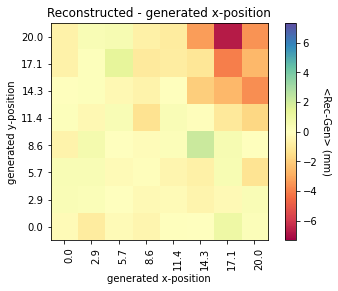

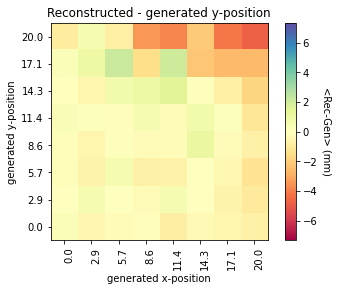

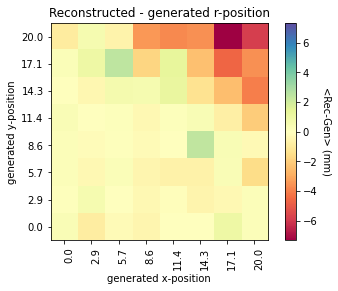

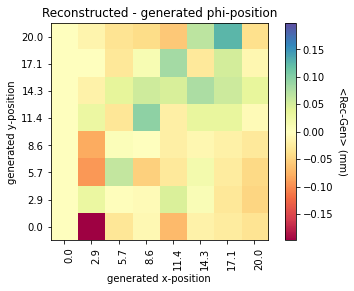

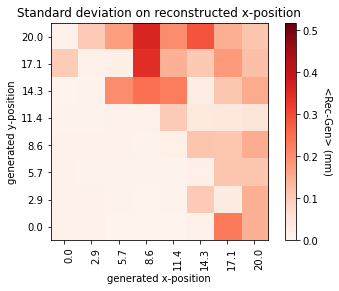

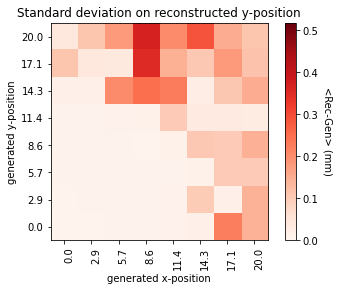

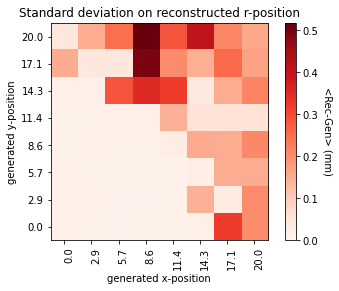

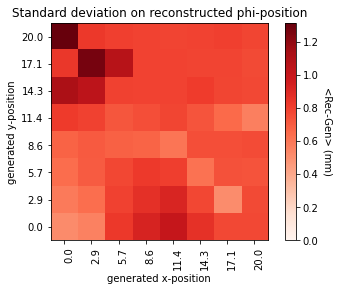

In [20]:
ana = Analysis(recs=recs, xsize=xbins, ysize=ybins)

ana.merge()
ana.plot2d(type = "xdif")
ana.plot2d(type = "ydif")
ana.plot2d(type = "rdif")
ana.plot2d(type = "phidif")
ana.plot2d(type = "xsig")
ana.plot2d(type = "ysig")
ana.plot2d(type = "rsig")
ana.plot2d(type = "phisig")


x_gen =  0.0 |  y_gen =  0.0
x_rec =  -0.2190646453020543 |  y_rec =  0.23644390264662674
x_dif =  -0.2190646453020543 |  y_dif =  0.23644390264662674
x_gen =  0.0 |  y_gen =  2.857142857142857
x_rec =  0.2877246476352578 |  y_rec =  2.9095082057184465
x_dif =  0.2877246476352578 |  y_dif =  0.05236534857558928
x_gen =  0.0 |  y_gen =  5.714285714285714
x_rec =  0.3488194481287461 |  y_rec =  5.919402051502197
x_dif =  0.3488194481287461 |  y_dif =  0.2051163372164826
x_gen =  0.0 |  y_gen =  8.571428571428571
x_rec =  -0.546766952713409 |  y_rec =  8.783104969514424
x_dif =  -0.546766952713409 |  y_dif =  0.21167639808585292
x_gen =  0.0 |  y_gen =  11.428571428571429
x_rec =  0.13739365491885477 |  y_rec =  11.736979877034642
x_dif =  0.13739365491885477 |  y_dif =  0.30840844846321325
x_gen =  0.0 |  y_gen =  14.285714285714286
x_rec =  -0.04999409168946854 |  y_rec =  14.27223824912103
x_dif =  -0.04999409168946854 |  y_dif =  -0.013476036593257135
x_gen =  0.0 |  y_gen =  17.14285

x_rec =  10.465209318885297 |  y_rec =  15.87261751610933
x_dif =  -6.677647823971846 |  y_dif =  -4.1273824838906705
x_gen =  20.0 |  y_gen =  0.0
x_rec =  20.207545626452173 |  y_rec =  -0.6672709684324462
x_dif =  0.20754562645217334 |  y_dif =  -0.6672709684324462
x_gen =  20.0 |  y_gen =  2.857142857142857
x_rec =  20.316933601838244 |  y_rec =  1.9208538939147162
x_dif =  0.3169336018382438 |  y_dif =  -0.936288963228141
x_gen =  20.0 |  y_gen =  5.714285714285714
x_rec =  18.768582951181674 |  y_rec =  4.478267047245267
x_dif =  -1.2314170488183258 |  y_dif =  -1.2360186670404474
x_gen =  20.0 |  y_gen =  8.571428571428571
x_rec =  19.996585928192914 |  y_rec =  7.936742293381671
x_dif =  -0.003414071807085861 |  y_dif =  -0.6346862780469005
x_gen =  20.0 |  y_gen =  11.428571428571429
x_rec =  18.30160882558792 |  y_rec =  10.31618438319829
x_dif =  -1.6983911744120803 |  y_dif =  -1.1123870453731382
x_gen =  20.0 |  y_gen =  14.285714285714286
x_rec =  16.352909304037045 |  y_

Text(0, 0.5, 'sigma (radians)')

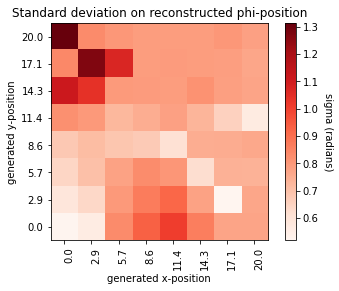

In [25]:
xgens, ygens, xdif, ydif, rdif, phidif, xsig, ysig, rsig, phisig = ana.merge()


fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(xgens)))
ax.set_yticks(np.arange(len(ygens)))
ax.set_xticklabels(xgens)
ax.set_yticklabels(ygens)
ax.set_xlabel("generated x-position")
ax.set_ylabel("generated y-position")
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

im = ax.imshow(phisig, cmap = 'Reds', vmin=phisig.min(), vmax=phisig.max())
ax.set_title("Standard deviation on reconstructed phi-position")
cbar = ax.figure.colorbar(im, ax=ax)
ax.invert_yaxis()
cbar.ax.set_ylabel('sigma (radians)', rotation=-90, va="bottom")  

(array([68.,  4., 24., 12.,  4.,  8.,  2.,  2.,  2.,  2.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ]),
 <a list of 10 Patch objects>)

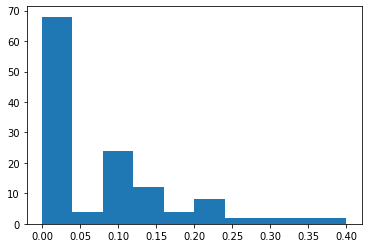

In [43]:
xlist=[]
for i in range(len(xgens)):
    for j in range(len(ygens)):
        xlist.append(xsig[j,i])
        xlist.append(ysig[j,i])
plt.hist(xlist, bins=10, range=(0,0.4))

In [27]:
print(ysig)
print("woopsiedaisy")
print(xsig)

[[0.00711842 0.00730384 0.00883489 0.0099722  0.01180507 0.01504907
  0.22415936 0.14189102]
 [0.0079113  0.00851958 0.00834012 0.00917625 0.01104281 0.10113243
  0.01515096 0.14264538]
 [0.00866411 0.00834277 0.00882261 0.00912643 0.00959941 0.01233763
  0.10240315 0.10218424]
 [0.00841339 0.00935599 0.00884214 0.00797933 0.01330166 0.10569767
  0.10312959 0.14421726]
 [0.00926186 0.00962115 0.0104715  0.01279186 0.10222126 0.03380306
  0.03393273 0.02989751]
 [0.01619477 0.01538809 0.20628599 0.25099133 0.22994952 0.02624694
  0.10839898 0.1507708 ]
 [0.11199741 0.04222427 0.03661905 0.35319919 0.14596262 0.10571337
  0.18138715 0.11609905]
 [0.04049319 0.11168838 0.18124682 0.36833125 0.20459204 0.2909486
  0.15344305 0.11160072]]
woopsiedaisy
[[0.01234437 0.01164661 0.00804383 0.00738456 0.00742278 0.01284894
  0.23083763 0.14569184]
 [0.0118875  0.0114737  0.00812207 0.00775076 0.0083829  0.10242634
  0.02656988 0.14761107]
 [0.01157488 0.0098189  0.00897739 0.00833865 0.00921349 

(array([ 4.,  6.,  8., 31.,  7.,  2.,  2.,  2.,  0.,  1.]),
 array([0.5 , 0.58, 0.66, 0.74, 0.82, 0.9 , 0.98, 1.06, 1.14, 1.22, 1.3 ]),
 <a list of 10 Patch objects>)

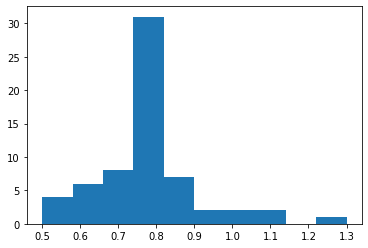

In [44]:
xlist=[]
for i in range(len(xgens)):
    for j in range(len(ygens)):
        xlist.append(phisig[j,i])
plt.hist(xlist, bins=10, range=(0.5,1.3))

# Plots from here ...... #

In [7]:
sx = []
sy = []
sr=[]
sphi=[]
x0 = []
y0 = []
r0 =[]
phi0 =[]
dx = []
dy = []
dr=[]
dphi=[]
dx_err = []
dy_err = []
dr_err = []
dphi_err = []

i=1

# loop through all the simulated locations
for reco in recs:
    df = reco.df_rec[reco.df_rec.status == 1]
    #print('xr =',df.xr.mean(),' yr =',df.yr.mean())
    dxtemp = df.xr.mean()-reco.sim.get_x0()[0]
    dytemp = df.yr.mean()-reco.sim.get_x0()[1]
    dx.append(dxtemp)
    dy.append(dytemp)
    dr.append((df.xr.mean()**2+df.yr.mean()**2)**0.5-(reco.sim.get_x0()[0]**2+reco.sim.get_x0()[1]**2)**0.5)
    dphi.append(np.arctan(df.yr.mean()/df.xr.mean())-np.arctan(reco.sim.get_x0()[1]/reco.sim.get_x0()[0]))

    sx.append(df.xr.sem())
    sy.append(df.yr.sem())
    sr.append(((df.xr.sem())**2+(df.yr.sem())**2)**0.5)
    sphi.append(np.arctan(df.yr.sem()/df.xr.sem()))
    x0temp = reco.sim.get_x0()[0]
    y0temp = reco.sim.get_x0()[1]
    x0.append(x0temp)
    y0.append(y0temp)
    r0.append(((reco.sim.get_x0()[0])**2+(reco.sim.get_x0()[1])**2)**0.5)
    if x0temp != 0 and y0temp != 0:
        phi0.append(np.arctan(y0temp/x0temp))
    else:
        phi0.append(np.nan)
    if i%100 == 0:
        print("data ordening reconstruction ", i, " complete")
    i += 1

# reconstruction resolution
dx_err = np.array(sx)/np.sqrt(n_uv)
dy_err = np.array(sy)/np.sqrt(n_uv)
dr_err = np.array(sr)/np.sqrt(n_uv)
dphi_err = np.array(sphi)/np.sqrt(n_uv)


print("data ordening complete")

<ipython-input-7-f17b3884b090>:29: RuntimeWarning: invalid value encountered in double_scalars
  dphi.append(np.arctan(df.yr.mean()/df.xr.mean())-np.arctan(reco.sim.get_x0()[1]/reco.sim.get_x0()[0]))
<ipython-input-7-f17b3884b090>:29: RuntimeWarning: divide by zero encountered in double_scalars
  dphi.append(np.arctan(df.yr.mean()/df.xr.mean())-np.arctan(reco.sim.get_x0()[1]/reco.sim.get_x0()[0]))


data ordening complete


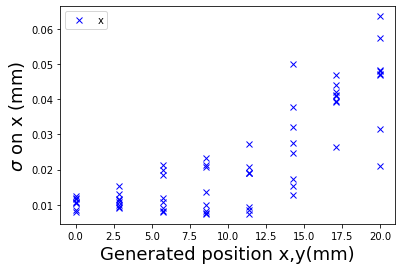

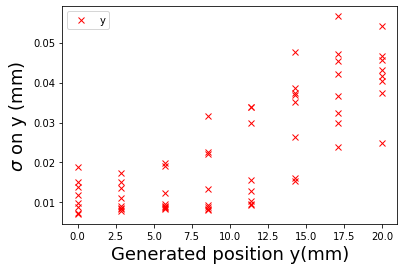

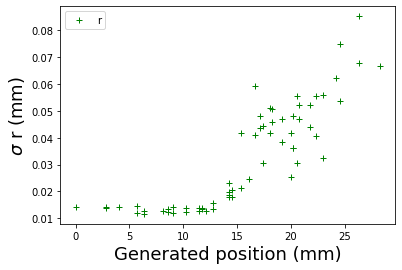

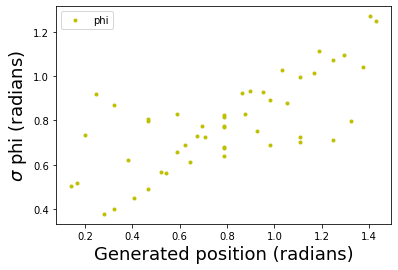

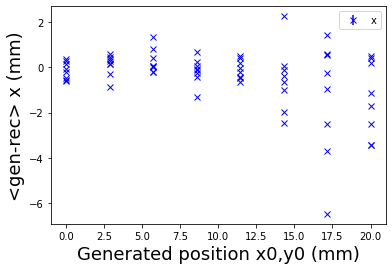

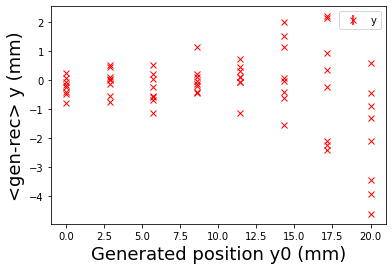

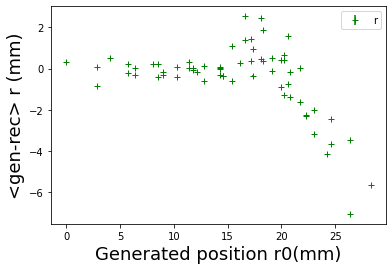

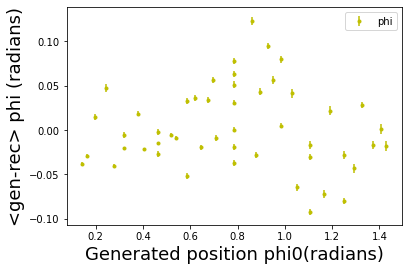

In [8]:
#standard deviation on reconstruction
plt.plot(x0,sx,'bx')
plt.xlabel('Generated position x,y(mm)',fontsize=18)
plt.ylabel('$\sigma$ on x (mm)',fontsize=18)
plt.legend(['x'])
plt.show()

plt.plot(y0,sy,'rx')
plt.xlabel('Generated position y(mm)',fontsize=18)
plt.ylabel('$\sigma$ on y (mm)',fontsize=18)
plt.legend(['y'])
plt.show()

plt.plot(r0,sr, 'g+')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('$\sigma$ r (mm)',fontsize=18)
plt.legend(['r'])
plt.show()

plt.plot(phi0,sphi, 'y.')
plt.xlabel('Generated position (radians)',fontsize=18)
plt.ylabel('$\sigma$ phi (radians)',fontsize=18)
plt.legend(['phi'])
plt.show()

# reconstruction bias
plt.errorbar(x0,dx,fmt='bx',yerr=dx_err)
plt.xlabel('Generated position x0,y0 (mm)',fontsize=18)
plt.ylabel('<gen-rec> x (mm)',fontsize=18)
plt.legend(['x'])
plt.show()

plt.errorbar(y0,dy,fmt='rx',yerr=dy_err)
plt.xlabel('Generated position y0 (mm)',fontsize=18)
plt.ylabel('<gen-rec> y (mm)',fontsize=18)
plt.legend(['y'])
plt.show()

plt.errorbar(r0,dr,fmt='g+',yerr=dr_err)
plt.xlabel('Generated position r0(mm)',fontsize=18)
plt.ylabel('<gen-rec> r (mm)',fontsize=18)
plt.legend(['r'])
plt.show()

plt.errorbar(phi0,dphi,fmt='y.',yerr=dphi_err)
plt.xlabel('Generated position phi0(radians)',fontsize=18)
plt.ylabel('<gen-rec> phi (radians)',fontsize=18)
plt.legend(['phi'])
plt.show()

generated pos =  [11.42857143 20.          0.        ]
<xr> =  10.949697740763016  +/- 0.020629388564835444  mm
    rms_x =  2.062526227445217  mm
<yr> =  16.57444662634325  +/- 0.02480150185177023  mm
    rms_y =  2.479654105527061  mm


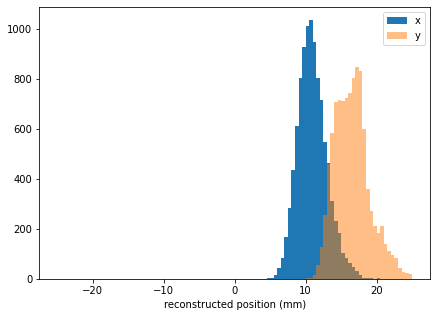

In [9]:
i=39

rec = recs[i]
print('generated pos = ', rec.sim.get_x0())
recs[i].plot(type="res",bins=100,range=(-25,25))

[11.42857143  2.85714286  0.        ]


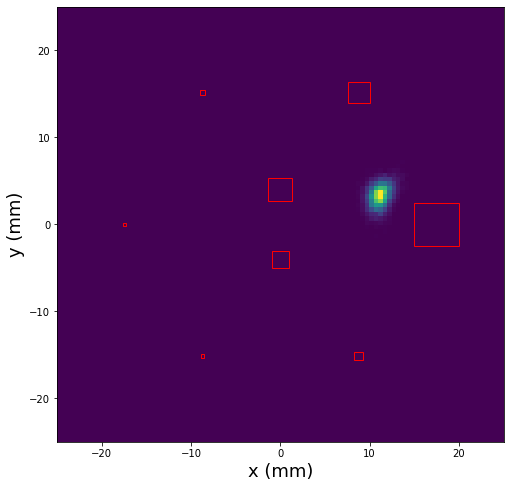

In [10]:
i=33
rec = recs[i]
print(rec.sim.get_x0())
ax = recs[i].plot(type="xy",range=((-25,25),(-25,25)))

 N(UV) reco =  48832.432255358355  +/- 43.645182422261726


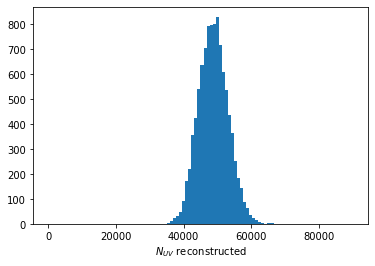

In [11]:
recs[i].plot(type="intensity",range=(0,90000))

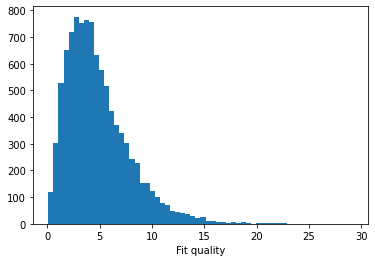

In [12]:
recs[i].plot(type="fit_quality",bins=60)

In [13]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

(0.0, 30.0)

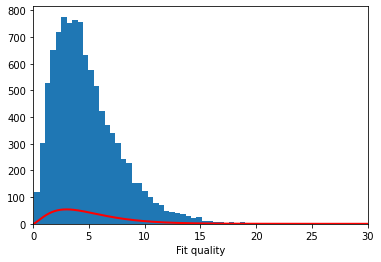

In [14]:
import scipy.stats as stats
# Plot the theoretical density of f
x = np.arange(0, 50, .05)
plt.plot(x, 350*stats.chi2.pdf(x, df=5), color='r', lw=2)
#h=plt.hist(df['chi2'],bins=50)
rec.plot(type="fit_quality",bins=60)
plt.xlim([0,30])

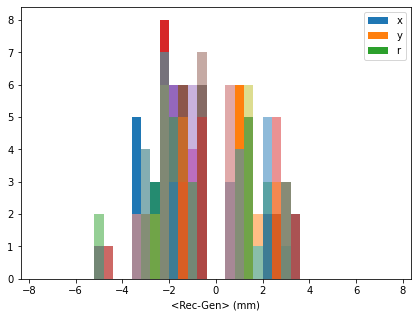

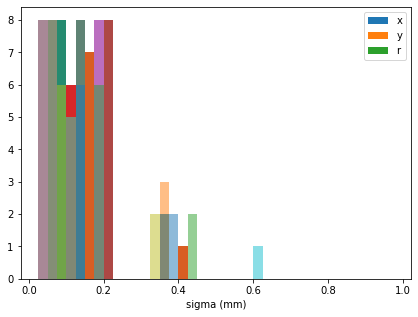

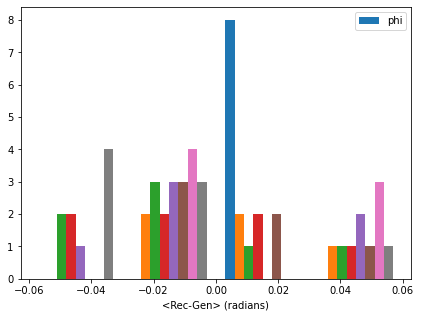

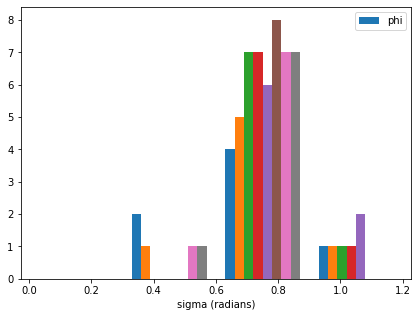

In [15]:
bins = 4

ana.plot(type = "dif", bins = bins, range = (-8,8))
ana.plot(type = "sig", bins =bins , range = (0,1))
ana.plot(type = "phidif", bins =bins, range = (-0.06,0.06))
ana.plot(type = "phisig", bins =bins, range = (0,1.2))
